# This notebook should have the statistics and figures testing the preregistered hypotheses

[Link to AsPredicted](https://aspredicted.org/blind.php?x=PQA_WPB)

In [10]:
# imort Libraries
import pandas as pd
import numpy as np
import scipy 
import os
import re
from natsort import natsorted
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt

## H1 Reaction Times:
1. Subjects will be fastor for large relative to small incentive cues (irrespective of reward and loss)
2.  This difference will be largest for individuals with greater reward sensitivity and substance use.

In [103]:
# Gather data
allfiles = natsorted([os.path.join(root,f) for root,dirs,files in os.walk(
    '../../istart/Monetary_Incentive/bids_archive/bids/') for f in files])
data=[]
for f in allfiles:
    #print(f)
    sub='sub-'+re.search('bids/sub-(.*)/sub',f).group(1)
    run='run-'+re.search('run-(.*)_events',f).group(1)
    # *****CODE FOR GETTING DATA FROM .mat FILES ****
    #mat = loadmat('../../istart/Monetary_Incentive/data/sub-1007/run-1_output.mat')  # load mat-file
    #mdata = mat['output']  # variable in mat file
    #mdtype = mdata.dtype  # dtypes of structures are "unsized objects"
    #ndata = {n: mdata[n][0, 0] for n in mdtype.names}
    #columns = [item for item in ndata.keys()]
    #tmp = pd.DataFrame(np.concatenate([ndata[c] for c in columns], axis=0).T,
    #                  columns=columns)
    tmp=pd.read_csv(f,sep='\t')
    if len(tmp)>10:
        if sub!='sub-999':
            tmp['sub']=sub
            tmp['run']=run
            data.append(tmp)
    
df=pd.concat(data)
display(df.head())
df['sqrt_RT']=np.sqrt(df['RT'])
stats=df.groupby(by=['sub','trial_type']).mean().reset_index()
display(stats)

,RT,target_starts,outcome,trial_starts,thresh,trial_type,sub,run
0,0.376352,6.022325,1.0,4.010861,0.280629,Small_loss,sub-1001,run-1
1,0.195337,12.055009,1.0,10.043120,0.438712,Neutral,sub-1001,run-1
2,0.303175,24.886177,1.0,20.874118,0.366443,Large_loss,sub-1001,run-1
3,0.551095,33.515978,0.0,30.504591,0.398247,Large_loss,sub-1001,run-1
4,0.301779,42.986209,0.0,38.973363,0.456776,Large_gain,sub-1001,run-1


,sub,trial_type,RT,target_starts,outcome,trial_starts,thresh,sqrt_RT
0,sub-1001,Large_gain,0.323590,219.369363,0.650000,216.408850,0.401755,0.558826
1,sub-1001,Large_loss,0.301056,217.355984,0.700000,214.245487,0.401661,0.518002
2,sub-1001,Neutral,0.373899,226.889770,0.700000,223.779326,0.441816,0.583628
3,sub-1001,Small_gain,0.382867,259.807892,0.600000,256.847558,0.396264,0.605866
4,sub-1001,Small_loss,0.356782,211.629620,0.650000,208.719228,0.415588,0.572297
...,...,...,...,...,...,...,...,...
235,sub-3190,Large_gain,0.284909,302.848576,0.866667,299.912450,0.372809,0.524783
236,sub-3190,Large_loss,0.400848,306.206649,0.666667,303.003899,0.423877,0.606688
237,sub-3190,Neutral,0.405927,349.408369,0.666667,346.405761,0.496389,0.615062
238,sub-3190,Small_gain,0.299278,405.168269,0.600000,402.098977,0.345177,0.539376


## a. Testing conditions Large vs Small Incentive

 A related t-test of reaction times between large & small Loss revealed a t = -2.616784193561145 p = 0.011900877602191414
 A related t-test of reaction times between large & small gains revealed a t = -2.2294836154948174 p = 0.03059828546772846


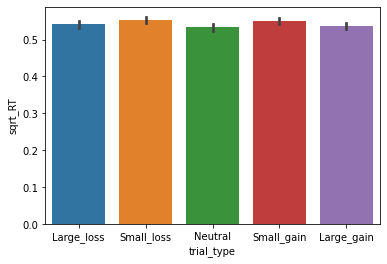

In [107]:
import seaborn as sms
options = ['Small_loss', 'Neutral', 'Large_loss', 'Large_gain', 'Small_gain']
# selecting rows based on condition
plt_df = df[df['trial_type'].isin(options)]
plt_df=plt_df[plt_df['RT']>0.01]
sms.barplot(x='trial_type',y='sqrt_RT',
            data=plt_df,order=['Large_loss','Small_loss','Neutral','Small_gain','Large_gain'])

# Large loss - Small Loss
t,p=scipy.stats.ttest_rel(stats[stats['trial_type']=='Large_loss']['sqrt_RT'],
                          stats[stats['trial_type']=='Small_loss']['sqrt_RT'])
print(" A related t-test of reaction times between large & small Loss revealed a t = %s p = %s"%(t,p))
#Large Gain- Small Gain
t,p=scipy.stats.ttest_rel(stats[stats['trial_type']=='Large_gain']['sqrt_RT'],
                          stats[stats['trial_type']=='Small_gain']['sqrt_RT'])
print(" A related t-test of reaction times between large & small gains revealed a t = %s p = %s"%(t,p))

## b. Testing Reward sensitivity

In [131]:
os.listdir('../derivatives/covariates/')
pers=pd.read_excel('../derivatives/covariates/final_output_composite.xls')

pers=pers[['Subject','Composite_Substance','Composite_Reward']]
pers=pers.dropna()
pers['Subject']=pers['Subject'].astype(int)
#pers['Subject']='sub-'+pers['Subject'].astype(str)
#pers

,Subject,Composite_Substance,Composite_Reward
0,1001.0,0.491868,0.468085
1,1003.0,0.006384,0.468085
2,1004.0,-0.284906,2.468085
3,1006.0,-1.158776,-0.531915
4,1009.0,-1.158776,1.468085
5,1010.0,3.266075,-1.531915
6,1011.0,-1.450066,2.468085
7,1012.0,-1.450066,-4.531915
8,1013.0,-0.802755,4.468085
9,1015.0,2.336704,-3.531915
